In [1]:
import sympy
sympy.init_printing()

In [2]:
t = sympy.symbols('t')
qh, q, omega_m, omega_b, omega_bh, K_q, E, alpha = sympy.symbols(
    '\hat{q}, q, omega_m, omega_b, \hat{\omega_b}, K_q, E, alpha',
    commutative=False)
M_q, w_q, mu, beta, a_sh, a_s, a_m, A, K_v, w_v, M_v = sympy.symbols(
    'M_q, w_q, mu, beta, \hat{a_s}, a_s, a_m, A, K_v, w_v, M_v',
    commutative=False)
I_ah, I_omegah, K_omega, M_omega, w_omega = sympy.symbols(
    '\hat{I_a}, \hat{I_\omega}, K_omega, M_omega, w_omega',
    commutative=False)
M_a, w_a, K_a, nu = sympy.symbols(
    'M_a, w_a, K_a, nu',
    commutative=False)

In [3]:
qh_dot_expr = 0.5*qh*(omega_m - omega_bh) + K_q*E*qh
qh_dot_expr

In [4]:
q_dot_expr = 0.5*q*(omega_m - omega_b) + M_q*w_q*q
q_dot_expr

In [5]:
Vh_dot = 1/a_sh*qh*a_m/qh + A + K_v*E
Vh_dot

In [6]:
Vh = A + 1/a_s*q*a_m/q + M_v*w_v
Vh

In [7]:
omega_bh_dot = 1/qh*K_omega*E*qh
omega_bh_dot

In [8]:
omega_b_dot = 1/q*M_omega*w_omega*q
omega_b_dot

In [9]:
a_s_dot = a_s*M_a*w_a
a_s_dot

In [10]:
a_sh_dot = a_sh*K_a*E
a_sh_dot

In [11]:
def q_inv_dot(q, q_dot):
    return (-1/q*q_dot/q)

In [12]:
mu_expr = qh/q
mu_inv_expr = q/qh
beta_expr = q*(omega_bh - omega_b)/q
alpha_expr = a_sh/a_s
I_ah_expr = 1/a_sh*qh*a_m/qh
I_omegah_expr = qh*(omega_m - omega_bh)/qh
assert mu_expr*mu_inv_expr == 1

assert 1/a_s - 1/a_sh*alpha_expr == 0
assert 1/q - 1/qh*mu_expr == 0
assert q - mu_inv_expr*qh == 0
assert mu_expr*q - qh == 0
assert (omega_bh - omega_b)/q - 1/q*beta_expr == 0
assert (mu_inv_expr*I_omegah_expr*mu_expr*q + beta_expr*q - \
 q*(-omega_b + omega_m)).simplify() == 0

sub_invariants = {
    I_ah_expr: I_ah,
    I_omegah_expr: I_omegah
}
sub_commutative = {
    1/a_sh/mu: 1/mu/a_sh
}
sub_terms = {
    1/a_s: alpha*1/a_sh,
    1/q: 1/qh*mu,
    q: 1/mu*qh,
}
sub_error = {
    mu_expr: mu,
    (-0.5*mu*beta_expr).expand(): -0.5*mu*beta,
}
sub_beta = {
    beta_expr: beta,
    (omega_bh - omega_b)/q: 1/q*beta,
    q*(-omega_b + omega_m): 1/mu*I_omegah*mu*q + beta*q,
    1/q: 1/qh*mu,
    q: 1/mu*qh,
}

In [13]:
mu_dot_expr = (qh_dot_expr/q + qh*q_inv_dot(q, q_dot_expr)).expand().subs(
    qh, mu*q).subs(sub_error)
mu_dot_expr

In [14]:
nu_dot_expr = Vh_dot - Vh
nu_dot_expr = nu_dot_expr.subs(
    sub_terms).subs(sub_commutative).subs(sub_invariants)
nu_dot_expr

In [15]:
beta_dot = (q_dot_expr*(omega_bh - omega_b)/q +
    q*(omega_bh_dot - omega_b_dot)/q +
    q*(omega_bh - omega_b)*q_inv_dot(q, q_dot_expr))
beta_dot

In [16]:
beta_dot1 = beta_dot.subs({
    beta_expr: beta,
    (omega_bh - omega_b)/q: 1/q*beta,
    q*(-omega_b + omega_m): 1/mu*I_omegah*mu*q + beta*q,
    1/q: 1/qh*mu,
    q: 1/mu*qh,
})
beta_dot2 = beta_dot1.expand().simplify()
beta_dot2

In [17]:
cross = sympy.symbols('\\times', commutative=False)
sub_cross = {
    0.5/mu*I_omegah*mu*beta -0.5*beta/mu*I_omegah*mu :
        1/mu*I_omegah*mu * cross * beta,
    M_q*w_q*beta - beta*M_q*w_q: 2 * M_q*w_q* cross * beta,
}
beta_dot3 = beta_dot2.subs(sub_cross)
beta_dot3

In [18]:
alpha_dot = 1/(a_s**2)*(a_s*a_sh_dot - a_sh*a_s_dot)
alpha_dot = alpha_dot.collect(a_s*a_sh).subs(1/a_s*a_sh, alpha)
alpha_dot

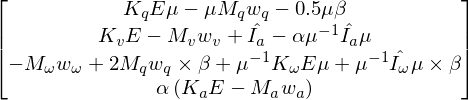

In [19]:
e_dot = sympy.Matrix([mu_dot_expr, nu_dot_expr, beta_dot3, alpha_dot])
e_dot

Sympy uses the wrong rules for the derivative on the inverse, which
causes A to be wrong.

In [20]:
(1/mu*I_ah*mu).diff(mu)

In [21]:
(1/mu).diff(mu)

In [22]:
nu_dot_expr.diff(mu)

In [23]:
e = sympy.Matrix([mu, nu, beta, alpha])
e.T

In [24]:
w = sympy.Matrix([w_q, w_v, w_omega, w_a])
w.T

In [25]:
nu_dot_expr

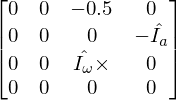

In [26]:
sub_lin = {
    mu: 1,
    nu: 0,
    beta: 0,
    alpha: 1,
    E: 0,
    w_q: 0,
    w_a: 0,
}
A = e_dot.jacobian(e).subs(sub_lin)
A

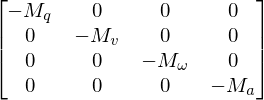

In [27]:
M = e_dot.jacobian(w).subs(sub_lin)
M

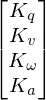

In [28]:
e_dot.jacobian(sympy.Matrix([E])).subs(sub_lin)